<a href="https://colab.research.google.com/github/JNeerajsai/Epics-Project/blob/main/epics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir(("/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted")))

['Train', 'Validation', '.ipynb_checkpoints', 'model_cnn_plot.png', 'Gmodel.h5']


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
import io
from PIL import Image
from tqdm import tqdm
from keras import layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display, clear_output
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
labels = [ 'Glaucoma_Negative', 'Glaucoma_Positive']
X_train, y_train, X_test, y_test  = [],[],[],[]

In [ ]:
image_size = 64
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train', i)
    print("Folder path : ", folderPath, "\n\n")
    print("Folder List : ", os.listdir(folderPath), "\n\n")
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
    print("\n\n")

Folder path :  /content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative 


Folder List :  ['001 (1).jpg', '002 (1).jpg', '001.jpg', '003 (1).jpg', '002.jpg', '003.jpg', '004 (1).jpg', '004.jpg', '006 (1).jpg', '005 (1).jpg', '005.jpg', '006.jpg', '009.jpg', '007.jpg', '008.jpg', '012.jpg', '011.jpg', '010.jpg', '014.jpg', '013.jpg', '015.jpg', '017.jpg', '016.jpg', '020.jpg', '018.jpg', '019.jpg', '023.jpg', '021.jpg', '022.jpg', '026.jpg', '025.jpg', '024.jpg', '027.jpg', '029.jpg', '028.jpg', '032.jpg', '030.jpg', '031.jpg', '035.jpg', '034.jpg', '033.jpg', '038.jpg', '040.jpg', '039.jpg', '043.jpg', '042.jpg', '044.jpg', '045.jpg', '046.jpg', '049.jpg', '048.jpg', '047.jpg', '052.jpg', '051.jpg', '053.jpg', '055.jpg', '056.jpg', '054.jpg', '059.jpg', '057.jpg', '058.jpg', '061.jpg', '060.jpg', '062.jpg', '063.jpg', '064.jpg', '067.jpg', '065.jpg', '066.jpg', '068.jpg', '070.jpg', '071.jpg', '073.jpg', '075.jpg', '074.jpg', '078.jpg', '079.jpg', '077.

100%|██████████| 392/392 [00:51<00:00,  7.63it/s]





Folder path :  /content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive 


Folder List :  ['036.jpg', '037.jpg', '041.jpg', '069.jpg', '050.jpg', '072.jpg', '086.jpg', '087.jpg', '076.jpg', '097.jpg', '094.jpg', '093.jpg', '138.jpg', '110.jpg', '116.jpg', '158.jpg', '160.jpg', '159.jpg', '168.jpg', '171.jpg', '165.jpg', '182.jpg', '181.jpg', '180.jpg', '213.jpg', '225.jpg', '208.jpg', '229.jpg', '228.jpg', '233.jpg', '241.jpg', '240.jpg', '245.jpg', '246.jpg', '247.jpg', '269.jpg', '273.jpg', '270.jpg', '278.jpg', '283.jpg', '277.jpg', '284.jpg', '286.jpg', '285.jpg', '289.jpg', '294.jpg', '293.jpg', '300.jpg', '301.jpg', '304.jpg', '305.jpg', '312.jpg', '306.jpg', '317.jpg', '327.jpg', '322.jpg', '330.jpg', '336.jpg', '345.jpg', '337.jpg', '340.jpg', '348.jpg', '349.jpg', '353.jpg', '359.jpg', '362.jpg', '354.jpg', '381.jpg', '366.jpg', '377.jpg', '385.jpg', '383.jpg', '382.jpg', '390.jpg', '389.jpg', '386.jpg', '402.jpg', '395.jpg', '398.jpg', '407

100%|██████████| 138/138 [00:15<00:00,  9.00it/s]

In [ ]:
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation', i)
    print("Folder path : ", folderPath, "\n\n")
    print("Folder List : ", os.listdir(folderPath), "\n\n")
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_test.append(img)
        y_test.append(i)
    print("\n\n")

Folder path :  /content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/Glaucoma_Negative 


Folder List :  ['485.jpg', '483.jpg', '484.jpg', '487.jpg', '489.jpg', '488.jpg', '492.jpg', '491.jpg', '493.jpg', '494.jpg', '497.jpg', '495.jpg', '498.jpg', '499.jpg', '501.jpg', '502.jpg', '500.jpg', '504.jpg', '503.jpg', '509.jpg', '513.jpg', '517.jpg', '510.jpg', '520.jpg', '521.jpg', '518.jpg', '525.jpg', '526.jpg', '522.jpg', '530.jpg', '529.jpg', '527.jpg', '535.jpg', '534.jpg', '531.jpg', '538.jpg', '537.jpg', '536.jpg', '540.jpg', '539.jpg', '541.jpg', '543.jpg', '542.jpg', '544.jpg', '547.jpg', '546.jpg', '551.jpg', '552.jpg', '548.jpg', '554.jpg', '553.jpg', '555.jpg', '559.jpg', '562.jpg', '561.jpg', '565.jpg', '563.jpg', '564.jpg', '568.jpg', '566.jpg', '567.jpg', '569.jpg', '570.jpg', '573.jpg', '575.jpg', '576.jpg', '574.jpg', '579.jpg', '581.jpg', '577.jpg', '585.jpg', '587.jpg', '583.jpg', '596.jpg', '590.jpg', '594.jpg', '597.jpg', '599.jpg', '602.jpg', '6

100%|██████████| 96/96 [00:38<00:00,  2.52it/s]





Folder path :  /content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation/Glaucoma_Positive 


Folder List :  ['601.jpg', '600.jpg', '598.jpg', '605.jpg', '604.jpg', '608.jpg', '613.jpg', '609.jpg', '612.jpg', '615.jpg', '618.jpg', '617.jpg', '619.jpg', '621.jpg', '622.jpg', '623.jpg', '624.jpg', '626.jpg', '627.jpg', '628.jpg', '631.jpg', '632.jpg', '630.jpg', '638.jpg', '634.jpg', '636.jpg', '644.jpg', '640.jpg', '641.jpg', '645.jpg', '646.jpg', '647.jpg', '648.jpg', '650.jpg'] 




100%|██████████| 34/34 [00:13<00:00,  2.56it/s]

Training Class Labels :  ['Glaucoma_Negative', 'Glaucoma_Positive'] 




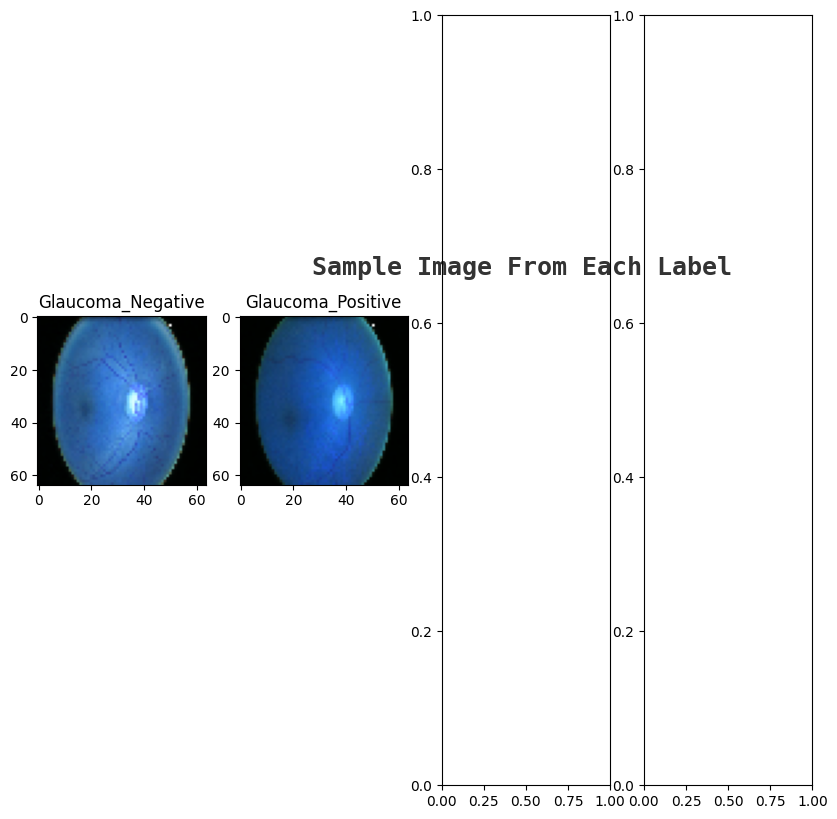

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(10,10))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold', fontname='monospace', y=0.62, x=0.4,alpha=0.8)
print("Training Class Labels : ", labels, "\n\n")


for i in labels:
    j=0
    while True :
        if y_train[j] == i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('on')
            k += 1
            break
        j += 1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')


Found 530 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [ ]:
batch_size = 32
model_info = classifier.fit(
    training_set,
    steps_per_epoch=int(455/batch_size),
    epochs=30,
    validation_data=test_set,
    validation_steps=int(113/batch_size),
)


Epoch 1/30
14/14 [==============================] - 82s 6s/step - loss: 1.5701 - accuracy: 0.5945 - val_loss: 0.6152 - val_accuracy: 0.7188
Epoch 2/30
14/14 [==============================] - 78s 6s/step - loss: 0.5752 - accuracy: 0.7512 - val_loss: 0.5666 - val_accuracy: 0.7396
Epoch 3/30
14/14 [==============================] - 79s 6s/step - loss: 0.5899 - accuracy: 0.7350 - val_loss: 0.5861 - val_accuracy: 0.7188
Epoch 4/30
14/14 [==============================] - 80s 6s/step - loss: 0.6115 - accuracy: 0.7212 - val_loss: 0.6142 - val_accuracy: 0.7188
Epoch 5/30
14/14 [==============================] - 81s 6s/step - loss: 0.5741 - accuracy: 0.7419 - val_loss: 0.6015 - val_accuracy: 0.7188
Epoch 6/30
14/14 [==============================] - 87s 6s/step - loss: 0.5700 - accuracy: 0.7299 - val_loss: 0.5595 - val_accuracy: 0.7708
Epoch 7/30
14/14 [==============================] - 79s 6s/step - loss: 0.5655 - accuracy: 0.7304 - val_loss: 0.5965 - val_accuracy: 0.7292
Epoch 8/30
14/14 [==

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=14)

In [ ]:
print("Length of the X_train set : ", len(X_train), "\n\n")
print("Length of The X_test set : ", len(X_test))

Length of the X_train set :  530 


Length of The X_test set :  130


In [ ]:
classifier.save('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Gmodel.h5')

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
import streamlit as st
from PIL import Image
import numpy as np
from keras.models import load_model
import cv2

# Load the trained model
model_path = '/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Gmodel.h5'  # Replace with the actual path
model = load_model(model_path)

def preprocess_image(image):
    # Preprocess the input image as needed for your model
    # (resize, normalize, etc.)
    # Example:
    image = cv2.resize(image, (256, 256))
    image = image / 255.0  # Normalize
    return image.reshape(1, 256, 256, 3)

def predict(image):
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)
    return prediction[0][0]

def main():
    st.title("Glaucoma Detection App")

    uploaded_file = st.file_uploader("Choose an image...", type="jpg")

    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image.", use_column_width=True)

        if st.button("Detect Glaucoma"):
            # Perform inference
            image_array = np.array(image)
            prediction = predict(image_array)

            # Display the result
            st.success(f"Prediction: {prediction:.2%} Glaucoma")

if __name__ == '__main__':
    main()


In [ ]:
import os

# Check the contents of the /content directory
files_in_content = os.listdir('/content')

# Print the list of files
print(files_in_content)


['.config', 'app.py', 'drive', 'sample_data']


In [ ]:
# Assuming your Streamlit app code is in this cell
app_code = """
import streamlit as st

# Your Streamlit app code here

if __name__ == '__main__':
    st.title("My Streamlit App")
"""

# Save the code to a file named app.py
with open('/content/app.py', 'w') as file:
    file.write(app_code)


In [ ]:
!streamlit run /content/app.py





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.232.231.1:8501



In [ ]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
classifier = Sequential()

# Add Convolutional layers
classifier.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
classifier.add(Flatten())

# Add Fully Connected layers
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classifier.fit(training_set, epochs=10, validation_data=test_set)


Epoch 1/10
17/17 [==============================] - 143s 8s/step - loss: 0.7687 - accuracy: 0.6604 - val_loss: 0.5725 - val_accuracy: 0.7385
Epoch 2/10
17/17 [==============================] - 135s 8s/step - loss: 0.5904 - accuracy: 0.7396 - val_loss: 0.5613 - val_accuracy: 0.7385
Epoch 3/10
17/17 [==============================] - 135s 8s/step - loss: 0.5820 - accuracy: 0.7396 - val_loss: 0.5774 - val_accuracy: 0.7385
Epoch 4/10
17/17 [==============================] - 143s 8s/step - loss: 0.5796 - accuracy: 0.7396 - val_loss: 0.5642 - val_accuracy: 0.7385
Epoch 5/10
17/17 [==============================] - 144s 8s/step - loss: 0.5710 - accuracy: 0.7396 - val_loss: 0.5673 - val_accuracy: 0.7385
Epoch 6/10
17/17 [==============================] - 136s 8s/step - loss: 0.5728 - accuracy: 0.7396 - val_loss: 0.5718 - val_accuracy: 0.7385
Epoch 7/10
17/17 [==============================] - 134s 8s/step - loss: 0.5763 - accuracy: 0.7396 - val_loss: 0.5888 - val_accuracy: 0.7385
Epoch 8/10
17

In [ ]:
accuracy = classifier.evaluate(test_set)

# Print the accuracy
print(f"Test set accuracy: {accuracy[1] * 100:.2f}%")

5/5 [==============================] - 10s 1s/step - loss: 0.5937 - accuracy: 0.7385
Test set accuracy: 73.85%


In [ ]:
train_accuracy = classifier.evaluate(training_set)
print(f"Training set accuracy: {train_accuracy[1] * 100:.2f}%")

17/17 [==============================] - 53s 3s/step - loss: 0.5655 - accuracy: 0.7396
Training set accuracy: 73.96%


In [ ]:
target_size = (256,256)
model=load_model('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Gmodel.h5')
print("model loaded")

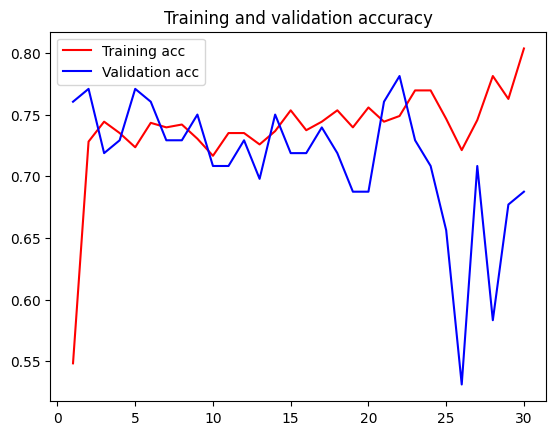

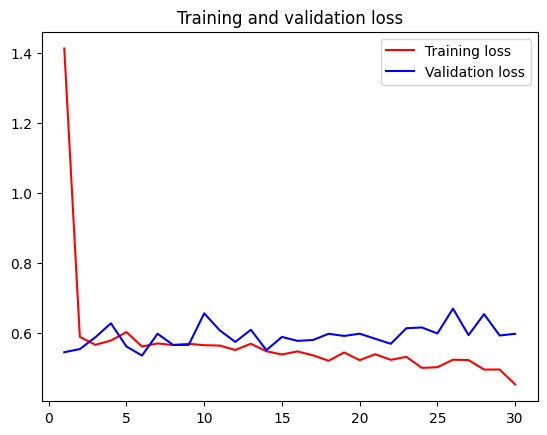

In [ ]:
classifier.save('/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Gmodel.h5')

acc = model_info.history['accuracy']
val_acc =model_info.history['val_accuracy']
loss = model_info.history['loss']
val_loss = model_info.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def num_classes(num):
    if num==0:
        return Glaucomapositive
    else :
        return Glaucomanegative


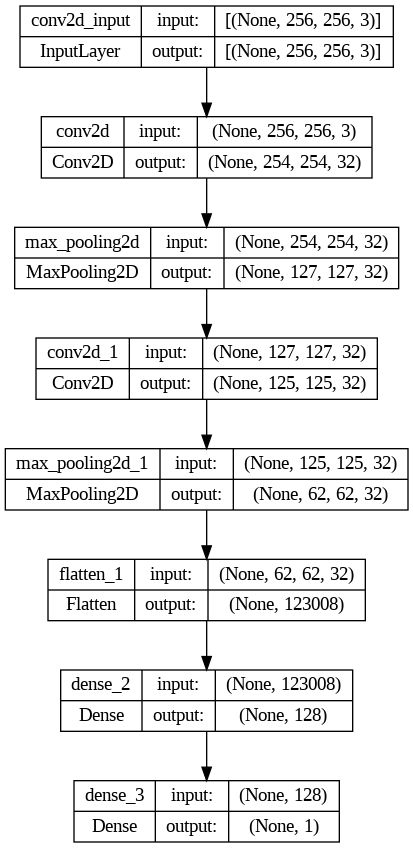

In [ ]:
from keras.utils import plot_model

plot_model(classifier, to_file='/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/model_cnn_plot.png',
           show_shapes=True, show_layer_names=True)

In [ ]:
classifier.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define paths to your dataset (modify these paths accordingly)
train_path = '/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'
valid_path = '/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Create a base model using pre-trained VGG16 (you can choose other models)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build a custom model on top of the base model
classifier= models.Sequential()
classifier.add(base_model)
classifier.add(layers.Flatten())
classifier.add(layers.Dense(256, activation='relu'))
classifier.add(layers.Dropout(0.5))
classifier.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classifier.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator))

# Extract features using the trained model
feature_extractor = models.Model(inputs=classifier.input, outputs=classifier.layers[-2].output)

# Extract features from your dataset
# This assumes you have a separate dataset for testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Keep the order for feature extraction
)

# Extract features for the test set
features = feature_extractor.predict(test_generator)

# Now, 'features' contains the extracted features that you can use for further analysis


Found 530 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
17/17 [==============================] - 418s 24s/step - loss: 1.5918 - accuracy: 0.6642
Epoch 2/10
17/17 [==============================] - 403s 23s/step - loss: 0.8741 - accuracy: 0.6849
Epoch 3/10
17/17 [==============================] - 396s 23s/step - loss: 0.5621 - accuracy: 0.7264
Epoch 4/10
17/17 [==============================] - 403s 24s/step - loss: 0.5726 - accuracy: 0.7321
Epoch 5/10
17/17 [==============================] - 404s 24s/step - loss: 0.5422 - accuracy: 0.7453
Epoch 6/10
17/17 [==============================] - 407s 24s/step - loss: 0.5373 - accuracy: 0.7415
Epoch 7/10
17/17 [==============================] - 401s 23s/step - loss: 0.5219 - accuracy: 0.7566
Epoch 8/10
17/17 [==============================] - 407s 24s/step - loss: 0.5418 - accuracy: 0.7321
Epoch 9/10
17/17 [==============================] - 396s 23s/step - loss: 0.5592 - accuracy: 0

**VGG16**

In [ ]:
vgg=VGG16(input_shape=(image_size,image_size,3) , weights='imagenet' , include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layers in vgg.layers:
  layers.trainable=False

In [ ]:
model_vgg = vgg.output
model_vgg = GlobalAveragePooling2D()(model_vgg)
model_vgg = Dense(128,activation='relu')(model_vgg)
model_vgg = Dropout(0.15)(model_vgg)
model_vgg = Dense(4,activation='softmax')(model_vgg)
model_vgg = Model(inputs=vgg.input,outputs=model_vgg)
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
model_vgg.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/VR-S_Workshop/effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto',verbose=1)

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')

NameError: ignored